In [1]:
#Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [2]:
#Importing data
datalink="http://bit.ly/w-data"
data= pd.read_csv(datalink)
print("Data Imported")
print(data)

Data Imported
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


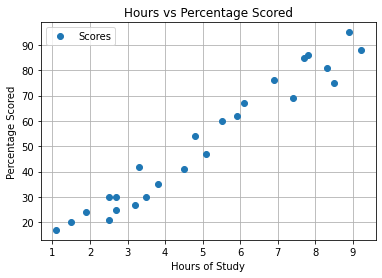

In [3]:
#Data Visualization
data.plot(x="Hours", y= "Scores", style="o")
plt.title("Hours vs Percentage Scored")
plt.xlabel("Hours of Study")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

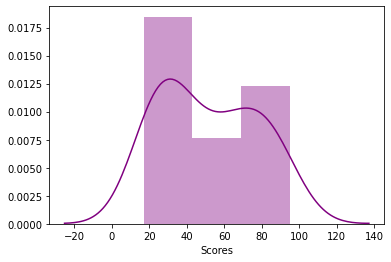

In [4]:
sbn.distplot(data['Scores'], color='purple')
plt.show()

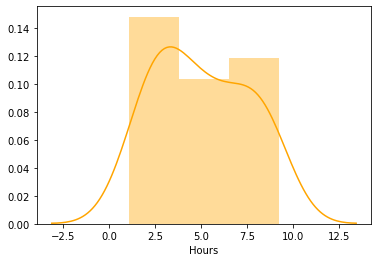

In [5]:
sbn.distplot(data['Hours'], color='orange')
plt.show()

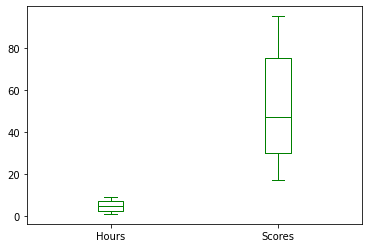

In [6]:
data.plot(kind="box",color="green")
plt.show()

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
print("Average Percentage:",data["Scores"].mean())

Average Percentage: 51.48


In [9]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x=data[['Hours']].values
y=data[['Scores']].values
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20, 1) (20, 1) (5, 1) (5, 1)


In [10]:
#training the model 
from sklearn.linear_model import LinearRegression
linearreg= LinearRegression()
linearreg.fit(x_train, y_train)
y_predict=linearreg.predict(x_train)

In [11]:
regression = LinearRegression()
regression.fit(x_train, y_train)
print("Training Done")

Training Done


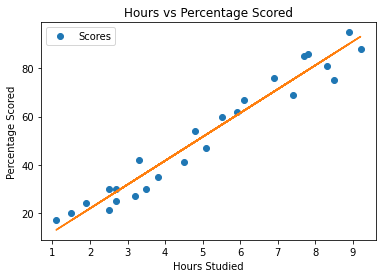

In [12]:
#Plotting the Trained Data (Regression line)
data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
line= regression.coef_*x+regression.intercept_
plt.plot(x, line)
plt.show()

In [13]:
print("Test Score")
print(regression.score(x_test, y_test))
print("Training Score")
print(regression.score(x_train, y_train))




Test Score
0.9454906892105356
Training Score
0.9515510725211552


In [14]:
data= pd.DataFrame({'Actual': [y_test], 'Predicted': [y_predict]})
data

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[39.67865466787518], [20.84840735465493], [79..."


In [15]:
#model efficiency
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_predict=regression.predict(x_test)
meansq_error= mean_squared_error(y_test, y_predict)
print("Mean Squared Error:",meansq_error)
meanabs_error= mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error:",meanabs_error)


Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975


In [16]:
print('Score of the student who studied for 9.25 hours a day', regression.predict([[9.25]]))

Score of the student who studied for 9.25 hours a day [[93.69173249]]
